# Supplementary Fig. 2g: GC content distribution in regions covered and not covered by SANGER sequencing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
source_data_path = 'SourceData'
sup_fig = os.path.join('Supplementary_Fig.2','Supplementary_Fig.2g')

paths_files_fig = os.path.join(source_data_path, sup_fig)


In [3]:
#Input files:

#Original input source:
#bedtools nuc -fi ../XENTRv10-1.fasta -bed sanger.gt2x.pb3x.v.nogap.nolt3x.mrg200.bed  >NO_SANGER_GC.bed
#bedtools subtract -a  XENTRv10-1_Chrs_sizes.bed -b sanger.gt2x.pb3x.v.nogap.nolt3x.mrg200.bed >Genome_cov_by_sanger.bed
#bedtools nuc -fi ../XENTRv10-1.fasta -bed  Genome_cov_by_sanger.bed >SANGER_coverage_GC.bed

Sanger_nuc_content_file = os.path.join(paths_files_fig,'SANGER_coverage_GC.bed')
No_Sanger_nuc_content_file = os.path.join(paths_files_fig,'NO_SANGER_GC.bed')  #, names=['Chr','Start','End','NA'])


Saved as ~/SAPS/X_tropicalis_V10_Final/DATA_OUT/REPEAT_Classification_V2/Figs/Regions_SANGER_GC.svg


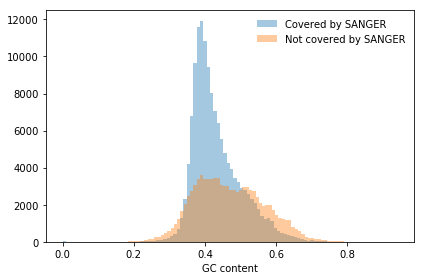

In [4]:

#bedtools nuc -fi ../XENTRv10-1.fasta -bed sanger.gt2x.pb3x.v.nogap.nolt3x.mrg200.bed  >NO_SANGER_GC.bed
#bedtools subtract -a  XENTRv10-1_Chrs_sizes.bed -b sanger.gt2x.pb3x.v.nogap.nolt3x.mrg200.bed >Genome_cov_by_sanger.bed
#bedtools nuc -fi ../XENTRv10-1.fasta -bed  Genome_cov_by_sanger.bed >SANGER_coverage_GC.bed

SANGER_GC = pd.read_csv(Sanger_nuc_content_file, sep='\t')#, names=['Chr','Start','End','NA'])
SANGER_GC = SANGER_GC.rename(columns={'#1_usercol':'Chr', '2_usercol':'Start','3_usercol':'End'})
SANGER_GC.loc[:,'Length'] = SANGER_GC['End']  - SANGER_GC['Start']

NO_SANGER_GC = pd.read_csv(No_Sanger_nuc_content_file, sep='\t')#, names=['Chr','Start','End','NA'])
NO_SANGER_GC = NO_SANGER_GC.rename(columns={'4_usercol':'Length', '#1_usercol':'Chr', '2_usercol':'Start','3_usercol':'End'})

plt.figure()
SANGER_GC[SANGER_GC.Length- SANGER_GC['10_num_N']>100]['5_pct_gc'].hist(bins=100, alpha=0.4, label= 'Covered by SANGER');
#plt.axvline(np.percentile(SANGER_GC[SANGER_GC.Length- SANGER_GC['10_num_N']>100]['5_pct_gc'],95))
plt.hist(NO_SANGER_GC[NO_SANGER_GC['Length']- NO_SANGER_GC['11_num_N']>100]['6_pct_gc'], bins=100, alpha=0.4, label= 'Not covered by SANGER')#, grid=False)
plt.grid(False)
plt.xlabel('GC content')
plt.legend(frameon=False)
plt.tight_layout()
out_fig_name = paths_files_fig+'.svg'
print "Saved as", out_fig_name
#plt.savefig(out_fig_name,bbox_inches='tight', transparent=True)

plt.show()

